# Logistic Regression Ad Data Project
The ad data in this project is simulated and was available as part of the **Python for Data Science and Machine Learning** program on Udemy.

The data contains the following:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

The goal of this Machine Learning project is to determine if a consumer will click on the ad using the available data on the consumer.


## Importing libraries and data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
ad_data = pd.read_csv('advertising.csv')

## Initial look at the data

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## Exploratory Data Analysis

Now that I have a basic understanding of the structure and data types of the provided ad data, it is time to look at a few plots to get an understanind of how the columns relate to each other. 

In [6]:
sns.set_style('whitegrid')

The mean age for the consumers in this study is 36.0 years old.


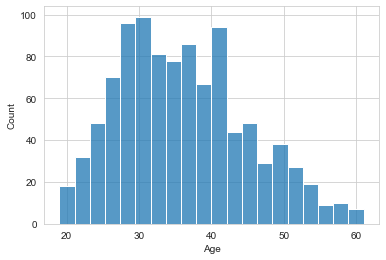

In [13]:
sns.histplot(x = 'Age', data = ad_data, bins = 20)
age_mean = round(ad_data['Age'].mean(),1)
print(f'The mean age for the consumers in this study is {age_mean} years old.')

We can see that the distribution of ages is roughly normal with a mean of 36.0 years.

Now we can look at all of the variables compaired to each other using Seaborn's pairplot feature. This will highlight potential areas to look deeper into. Since the goal of this project is to find out if a consumer will click on the ad or not, I will add more detail to the pairplot by having the data points presented in different colors based on whether or not they clicked on the ad.

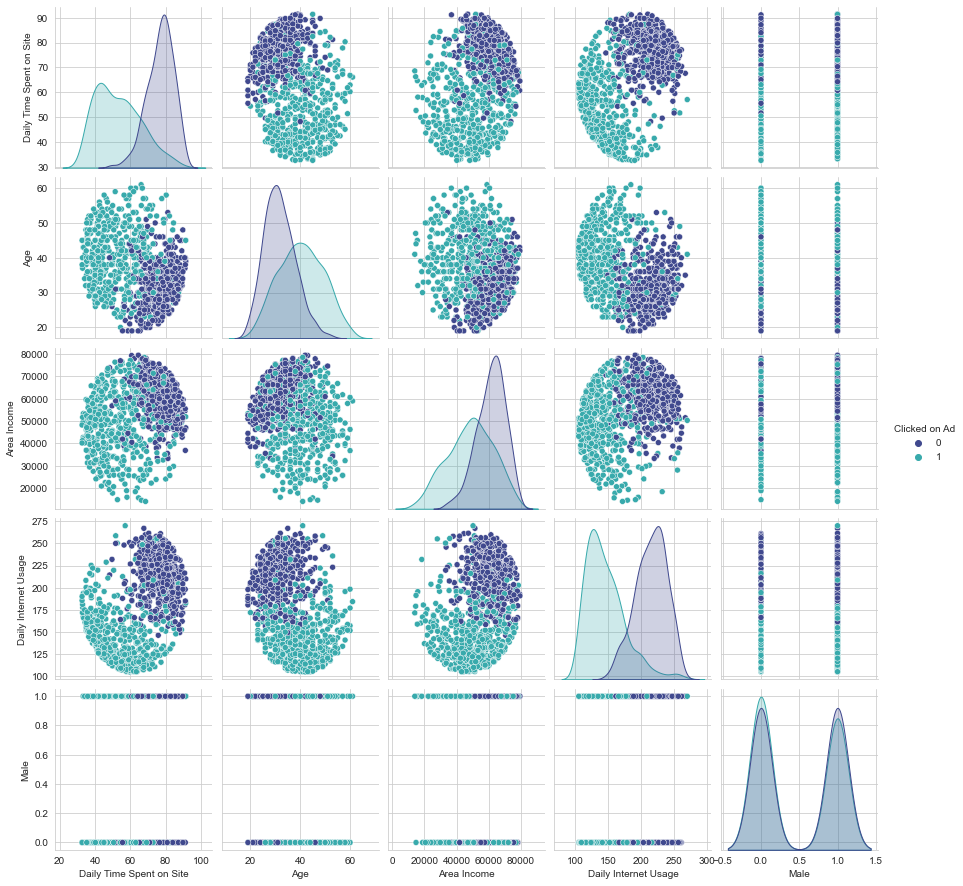

In [15]:
sns.pairplot(data = ad_data, hue = 'Clicked on Ad', palette = 'mako')

Some trends that we can see from this data.

<br />

**The following were more likely to click on the ad:**
*  Concumers who spent more time on the site
*  Younger consumers 
*  Consumers from area with higher average income

<br />
Two variable that do not to appear to contribute to the probability of a consumer clicking on the ad were daily internet usage and gender.


**Let's look at the Daily time spent on the internet and the age of the consumer.**

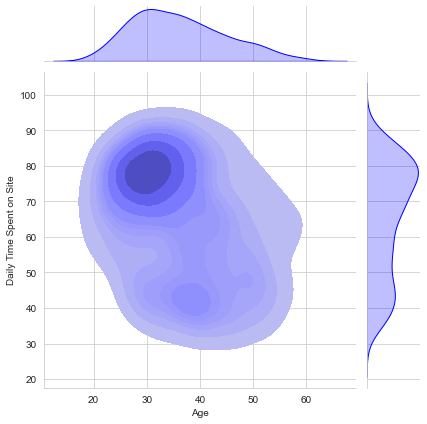

In [17]:
sns.jointplot(x = 'Age', data = ad_data, y = 'Daily Time Spent on Site', color = 'blue', kind = 'kde', fill = True)

We saw in the pairplot that both being younger and spending more time on the internet increased the likelihood of a consumer clicking on the ad. It is also important to see that being younger also is correlated with spending more time on the internet.

Now that we have a basic understanding of our data, we can start working on building out regression model.

## Logistic Regression

First we will need to slipt our data into two groups, training data and testing data. The training data is what will be used to build, or train, our model. Once we have a model, the test data will be used to test the accuracy of our model.

Since the goal of the project is to be able to predict if a consumer will click on an ad, we will set 'Clicked on Ad' as our data label (y) and the remaining columns as our variable matrix (X). 

In [19]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

For this project I have chosen the test data to be 33% of the overall data and the random state to be 101 for reproducibility.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

**Now to train and test our logistic regression.**
<br />
For this test, I ran into an issue that the default number of iterations was not sufficient to converge on a model. I reran the train with the new maximum iterations of 1000, and there was convergence on a solution.

In [22]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

**Predictions and Evaluations**

In [23]:
predictions = logmodel.predict(X_test)

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



We have the results from our model. Above is our classification report from the test. 

<br />

Our model has a 98% accuracy, a recal score of 98% and an F1 score of 98%.

<br />

Overall this model does a great job at predicting whether or not a consumer from the test data would click on an advertisement. 
